In [1]:
!pip install seaborn

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

from tqdm.notebook import tqdm
import mplhep as hep
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
samples_4mu = [
    "TTJets",   
    '4mu_500GeV_5p0GeV_0p08mm',
#    '4mu_500GeV_5p0GeV_0p8mm',
#    '4mu_500GeV_5p0GeV_8p0mm',
#    '4mu_500GeV_5p0GeV_40p0mm',
#    '4mu_500GeV_5p0GeV_80p0mm',
]

In [3]:
fileset = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=1)

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
)

channels = ["base", "2mu2e", "4mu"]
p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
    lj_reco_choices=["0.4"],
    llpnanoaod=True,
)

output = runner.run(fileset, treename="Events", processor_instance=p)
out = output["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

In [4]:
sig_lj = out["4mu_500GeV_5p0GeV_0p08mm"]['counters']['0.4']['base']['arr_lj']
bkg_lj = out["TTJets"]['counters']['0.4']['base']['arr_lj']

In [5]:
sig_lj

<LorentzVectorArray [[{x: 256, y: 48.4, ... photon_n: 0}]] type='1984 * var * Lo...'>

In [6]:
sig_lj1 = sig_lj[:,0]
sig_lj2 = sig_lj[:,1]

bkg_lj1 = bkg_lj[:,0]
bkg_lj2 = bkg_lj[:,1]

In [7]:
sig_lj1

<LorentzVectorArray [{x: 256, y: 48.4, ... photon_n: 0}] type='1984 * LorentzVec...'>

In [8]:
sig_lj2

<LorentzVectorArray [{x: -240, y: -41.9, ... photon_n: 0}] type='1984 * LorentzV...'>

In [11]:
sig_lj_lj_absdphi = abs(sig_lj2.phi - sig_lj1.phi)
sig_lj_lj_absdR = abs(sig_lj2.delta_r(sig_lj1))
sig_lj_lj_absdeta = abs(sig_lj2.eta - sig_lj1.eta)
sig_lj_lj_invmass = (sig_lj1 + sig_lj2).mass

bkg_lj_lj_absdphi = abs(bkg_lj2.phi - bkg_lj1.phi)
bkg_lj_lj_absdR = abs(bkg_lj2.delta_r(bkg_lj1))
bkg_lj_lj_absdeta = abs(bkg_lj2.eta - bkg_lj1.eta)
bkg_lj_lj_invmass = (bkg_lj1 + bkg_lj2).mass

In [12]:
print(sig_lj_lj_absdphi)
print(sig_lj_lj_absdR)
print(sig_lj_lj_absdeta)
print(sig_lj_lj_invmass)

[3.16, 3.15, 3.15, 3.09, 3.55, 3.18, 3.14, ... 2.88, 3.03, 3.15, 3.2, 3.5, 3.26]
[3.14, 3.15, 3.16, 3.09, 3.47, 3.22, 3.19, ... 3.6, 3.5, 3.16, 3.32, 2.86, 3.73]
[0.239, 0.298, 0.474, 0.132, 2.14, 0.847, ... 2.16, 1.74, 0.395, 1.25, 0.645, 2.19]
[508, 491, 493, 501, 489, 490, 492, 493, ... 509, 493, 492, 525, 488, 458, 547, 456]


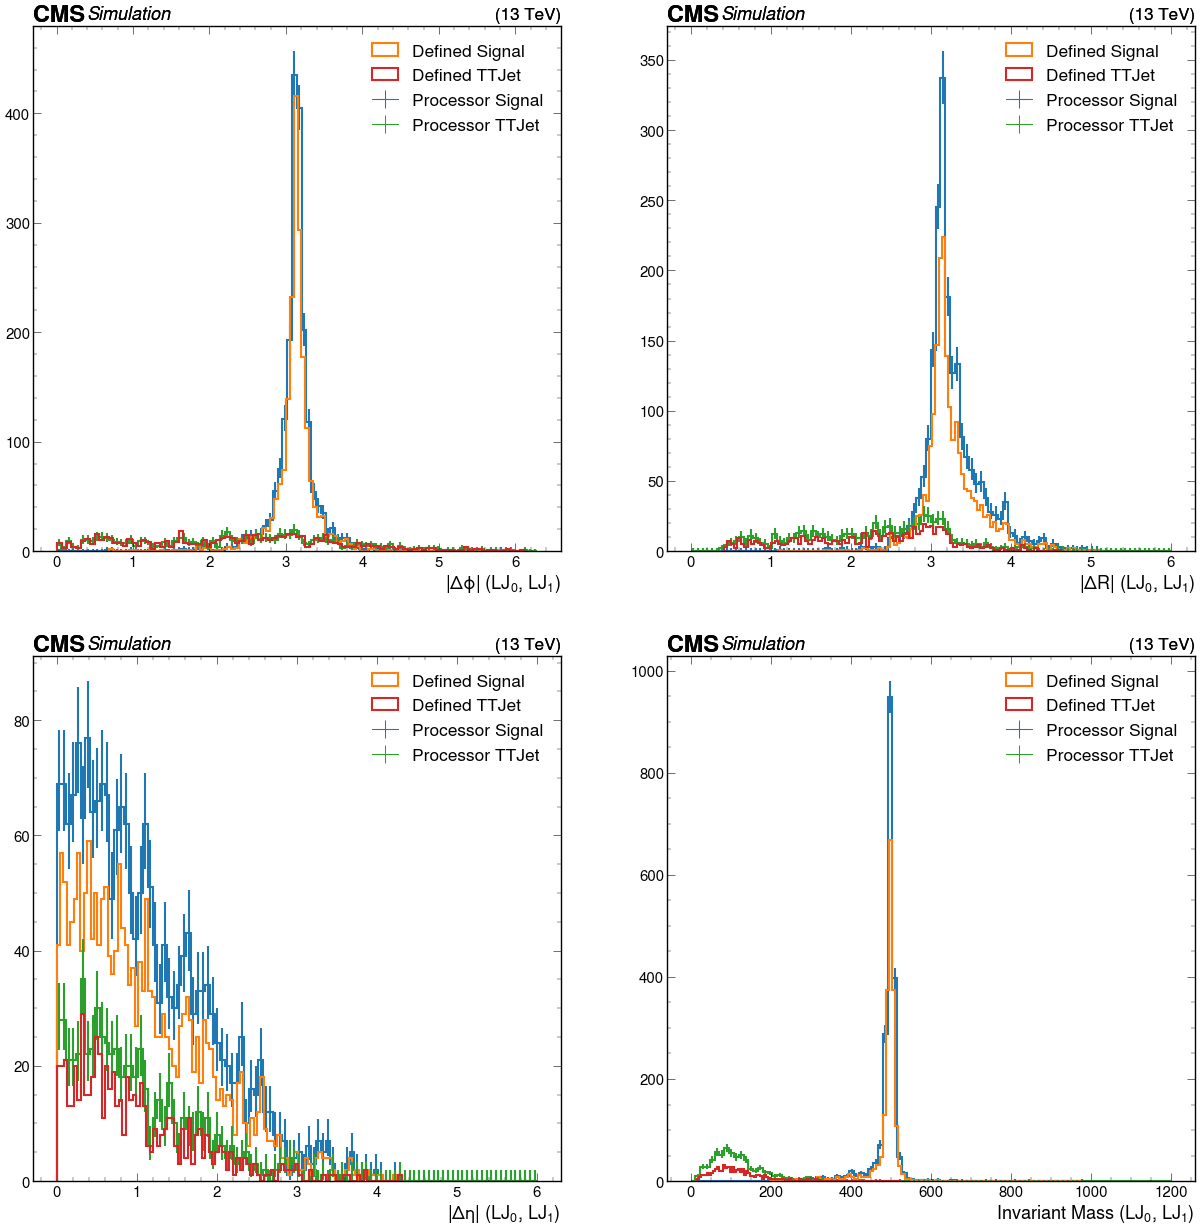

In [20]:
plt.subplots(2,2,figsize=(30,30))

plt.subplot(2,2,1)
utilities.plot(out["4mu_500GeV_5p0GeV_0p08mm"]["hists"]["lj_lj_absdphi"]['base', :], flow='none', density=False, linewidth=3, label='Processor Signal')
plt.hist(sig_lj_lj_absdphi, histtype='step', bins=100, density=False, linewidth=3, label='Defined Signal')
utilities.plot(out["TTJets"]["hists"]["lj_lj_absdphi"]['base', :], flow='none', density=False, linewidth=3, label='Processor TTJet')
plt.hist(bkg_lj_lj_absdphi, histtype='step', bins=100, density=False, linewidth=3, label='Defined TTJet')
plt.legend(fontsize=25)

plt.subplot(2,2,2)
utilities.plot(out["4mu_500GeV_5p0GeV_0p08mm"]["hists"]["lj_lj_absdR"]['base', :], flow='none', density=False, linewidth=3, label='Processor Signal')
plt.hist(sig_lj_lj_absdR, histtype='step', bins=100, density=False, linewidth=3, label='Defined Signal')
utilities.plot(out["TTJets"]["hists"]["lj_lj_absdR"]['base', :], flow='none', density=False, linewidth=3, label='Processor TTJet')
plt.hist(bkg_lj_lj_absdR, histtype='step', bins=100, density=False, linewidth=3, label='Defined TTJet')
plt.legend(fontsize=25)

plt.subplot(2,2,3)
utilities.plot(out["4mu_500GeV_5p0GeV_0p08mm"]["hists"]["lj_lj_absdeta"]['base', :], flow='none', density=False, linewidth=3, label='Processor Signal')
plt.hist(sig_lj_lj_absdeta, histtype='step', bins=100, density=False, linewidth=3, label='Defined Signal')
utilities.plot(out["TTJets"]["hists"]["lj_lj_absdeta"]['base', :], flow='none', density=False, linewidth=3, label='Processor TTJet')
plt.hist(bkg_lj_lj_absdeta, histtype='step', bins=100, density=False, linewidth=3, label='Defined TTJet')
plt.legend(fontsize=25)

plt.subplot(2,2,4)
utilities.plot(out["4mu_500GeV_5p0GeV_0p08mm"]["hists"]["lj_lj_invmass"]['base', :], flow='none', density=False, linewidth=3, label='Processor Signal')
plt.hist(sig_lj_lj_invmass, histtype='step', bins=100, density=False, linewidth=3, label='Defined Signal')
utilities.plot(out["TTJets"]["hists"]["lj_lj_invmass"]['base', :], flow='none', density=False, linewidth=3, label='Processor TTJet')
plt.hist(bkg_lj_lj_invmass, histtype='step', bins=100, density=False, linewidth=3, label='Defined TTJet')
plt.legend(fontsize=25)

In [34]:
print(len(sig_lj_lj_absdphi))
print(len(bkg_lj_lj_absdphi))

1984
646


In [27]:
df = pd.DataFrame({'Signal |$\Delta\phi$| ($LJ_{0}$, $LJ_{1}$)': sig_lj_lj_absdphi[:646]})

In [29]:
df['Signal |$\Delta$R| ($LJ_{0}$, $LJ_{1}$)'] = sig_lj_lj_absdR[:646]
df['Signal |$\Delta\eta$| ($LJ_{0}$, $LJ_{1}$)'] = sig_lj_lj_absdeta[:646]
df['Signal InvMass($LJ_{0}$, $LJ_{1}$)'] = sig_lj_lj_invmass[:646]

In [31]:
df['TTJet |$\Delta\phi$| ($LJ_{0}$, $LJ_{1}$)'] = bkg_lj_lj_absdphi
df['TTJet |$\Delta$R| ($LJ_{0}$, $LJ_{1}$)'] = bkg_lj_lj_absdR
df['TTJet |$\Delta\eta$| ($LJ_{0}$, $LJ_{1}$)'] = bkg_lj_lj_absdeta
df['TTJet InvMass($LJ_{0}$, $LJ_{1}$)'] = bkg_lj_lj_invmass

In [32]:
df

,"Signal |$\Delta\phi$| ($LJ_{0}$, $LJ_{1}$)","Signal |$\Delta$R| ($LJ_{0}$, $LJ_{1}$)","Signal |$\Delta\eta$| ($LJ_{0}$, $LJ_{1}$)","Signal InvMass($LJ_{0}$, $LJ_{1}$)","TTJet |$\Delta\phi$| ($LJ_{0}$, $LJ_{1}$)","TTJet |$\Delta$R| ($LJ_{0}$, $LJ_{1}$)","TTJet |$\Delta\eta$| ($LJ_{0}$, $LJ_{1}$)","TTJet InvMass($LJ_{0}$, $LJ_{1}$)"
0,3.155425,3.136901,0.239299,508.384936,4.000000,2.285451,0.101746,83.828612
1,3.149343,3.148013,0.298365,491.227399,0.371216,0.815914,0.726578,31.567832
2,3.154767,3.164121,0.473983,493.214964,4.162598,2.264298,0.793823,113.471476
3,3.090035,3.092841,0.131718,501.095501,3.698486,2.804006,1.087097,132.675874
4,3.553948,3.470899,2.144388,488.710358,0.152588,1.120061,1.109619,40.767775
...,...,...,...,...,...,...,...,...
641,2.706618,2.718506,0.253950,512.396662,1.784302,1.895490,0.639648,85.099065
642,3.168478,3.115093,0.048963,493.145356,1.662109,2.813319,2.269836,162.987220
643,3.220366,3.098323,0.467703,481.625654,2.771728,2.782279,0.242065,130.760073
644,2.833806,2.894503,0.589652,494.430488,4.359375,2.048889,0.704912,154.366619


In [35]:
df.corr()

,"Signal |$\Delta\phi$| ($LJ_{0}$, $LJ_{1}$)","Signal |$\Delta$R| ($LJ_{0}$, $LJ_{1}$)","Signal |$\Delta\eta$| ($LJ_{0}$, $LJ_{1}$)","Signal InvMass($LJ_{0}$, $LJ_{1}$)","TTJet |$\Delta\phi$| ($LJ_{0}$, $LJ_{1}$)","TTJet |$\Delta$R| ($LJ_{0}$, $LJ_{1}$)","TTJet |$\Delta\eta$| ($LJ_{0}$, $LJ_{1}$)","TTJet InvMass($LJ_{0}$, $LJ_{1}$)"
"Signal |$\Delta\phi$| ($LJ_{0}$, $LJ_{1}$)",1.000000,-0.041329,-0.104293,0.006894,0.009482,0.079463,0.069762,0.078175
"Signal |$\Delta$R| ($LJ_{0}$, $LJ_{1}$)",-0.041329,1.000000,0.833672,0.014559,-0.024769,-0.037219,-0.035003,-0.002029
"Signal |$\Delta\eta$| ($LJ_{0}$, $LJ_{1}$)",-0.104293,0.833672,1.000000,0.019935,-0.016950,-0.059284,-0.056376,-0.034113
"Signal InvMass($LJ_{0}$, $LJ_{1}$)",0.006894,0.014559,0.019935,1.000000,-0.019625,-0.045053,-0.054446,-0.025438
"TTJet |$\Delta\phi$| ($LJ_{0}$, $LJ_{1}$)",0.009482,-0.024769,-0.016950,-0.019625,1.000000,0.573051,0.081533,0.391242
"TTJet |$\Delta$R| ($LJ_{0}$, $LJ_{1}$)",0.079463,-0.037219,-0.059284,-0.045053,0.573051,1.000000,0.508910,0.731293
"TTJet |$\Delta\eta$| ($LJ_{0}$, $LJ_{1}$)",0.069762,-0.035003,-0.056376,-0.054446,0.081533,0.508910,1.000000,0.574501
"TTJet InvMass($LJ_{0}$, $LJ_{1}$)",0.078175,-0.002029,-0.034113,-0.025438,0.391242,0.731293,0.574501,1.000000


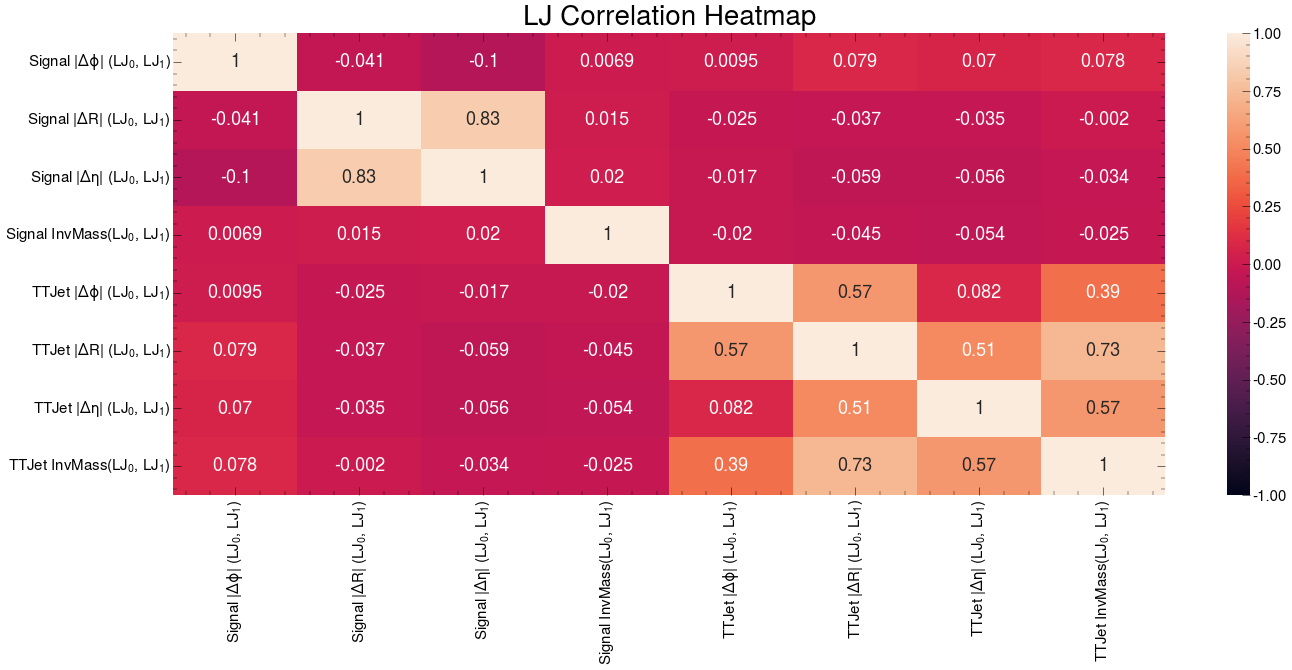

In [38]:
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('LJ Correlation Heatmap', fontdict={'fontsize':40}, pad=12);